<a href="https://colab.research.google.com/github/shonyeajin/kaggle_intro/blob/main/2018_data_science_bowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeajinshon","key":"5d9263b1f17cbceaaf414658d4f7f975"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
from IPython.core.display import JSON

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c data-science-bowl-2018

 93% 258M/276M [00:04<00:00, 41.1MB/s]
100% 276M/276M [00:04<00:00, 64.2MB/s]
  0% 0.00/2.67M [00:00<?, ?B/s]
100% 2.67M/2.67M [00:00<00:00, 87.5MB/s]
  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 52.8MB/s]
 55% 5.00M/9.10M [00:00<00:00, 20.4MB/s]
100% 9.10M/9.10M [00:00<00:00, 30.4MB/s]
  0% 0.00/2.62k [00:00<?, ?B/s]
100% 2.62k/2.62k [00:00<00:00, 869kB/s]
  0% 0.00/112k [00:00<?, ?B/s]
100% 112k/112k [00:00<00:00, 115MB/s]
 82% 65.0M/79.1M [00:01<00:00, 33.2MB/s]
100% 79.1M/79.1M [00:01<00:00, 54.7MB/s]


In [6]:
!mkdir input

In [7]:
!mkdir input/stage1_train

In [8]:
!unzip stage1_train.zip -d ./input/stage1_train

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./input/stage1_train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/160cf18b03df69978e2ed33335afcd781ebebf4ee42df566aaa6fd0aee66ac93.png  
  inflating: ./input/stage1_train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/16d3bf2426e9cda0e4f435de3a0c260d17be460f1c834c1282dfd68f9fcf7509.png  
  inflating: ./input/stage1_train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/1cfe69ef1dec8963e05ba8386a956af0073ba0bec2cc8ba534df81ef6dee905a.png  
  inflating: ./input/stage1_train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/1d2543cd2a8134ac2ca091a230bd15270826f8dd83c6594550b7f0fc85a15f8e.png  
  inflating: ./input/stage1_train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28/masks/24b50e6e3406e513d47ddfa9bd85505a95a266858cffc730a9ad7bc99936b800.png  
  inflating: ./input/stage1_train/d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe9

In [18]:
import pathlib
import imageio
import numpy as np

training_paths=pathlib.Path('/content/input/stage1_train').glob('*/images/*.png')

In [19]:
training_sorted=sorted([x for x in training_paths])

In [20]:
training_sorted

[PosixPath('/content/input/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'),
 PosixPath('/content/input/stage1_train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/images/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1.png'),
 PosixPath('/content/input/stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png'),
 PosixPath('/content/input/stage1_train/0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed/images/0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed.png'),
 PosixPath('/content/input/stage1_train/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf/images/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf.png'),
 PosixPath('/content/input/stage1_train/0280fa8f60f6bcae0f97d93c28f60be194f9309f

In [21]:
im_path=training_sorted[45]

In [22]:
im=imageio.imread(str(im_path))

In [23]:
print('Original image shape: {}'.format(im.shape))

Original image shape: (520, 696, 4)


In [26]:
from skimage.color import rgb2gray

im_gray=rgb2gray(im)
print('New image shape: {}'.format(im_gray.shape))

New image shape: (520, 696)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


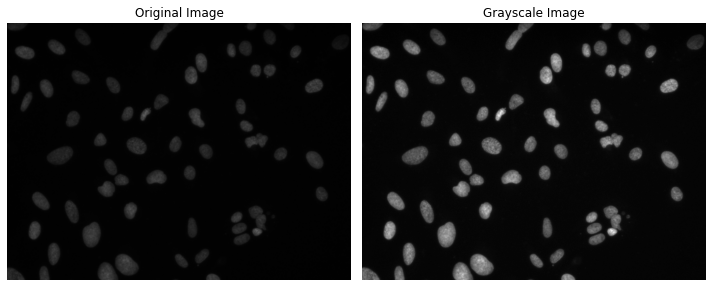

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

In [28]:
from skimage.filters import threshold_otsu

thresh_val=threshold_otsu(im_gray)
mask=np.where(im_gray > thresh_val, 1, 0)

In [39]:
if np.sum(mask==0) < np.sum(mask==1):
  mask=np.where(mask, 0, 1)

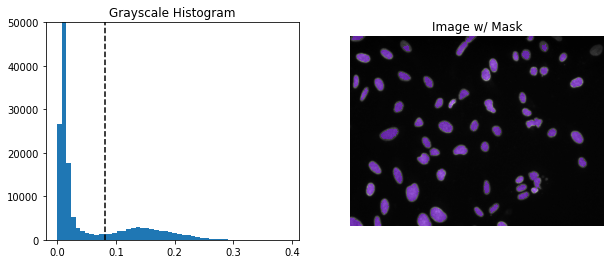

In [46]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
im_pixels=im_gray.flatten()
plt.hist(im_pixels, bins=50)
plt.vlines(thresh_val, 0, 100000, linestyle='--')
plt.ylim([0,50000])
plt.title('Grayscale Histogram')

plt.subplot(1,2,2)
mask_for_display=np.where(mask, mask, np.nan)
plt.imshow(im_gray, cmap='gray')
plt.imshow(mask_for_display, cmap='rainbow', alpha=0.5)
plt.axis('off')
plt.title('Image w/ Mask')

plt.show()

In [48]:
from scipy import ndimage

labels, nlabels= ndimage.label(mask)

In [55]:
label_arrays=[]
for label_num in range (1, nlabels+1):
  label_mask=np.where(labels==label_num, 1,0)
  label_arrays.append(label_mask)
print('There are {} separate components / objects detected.'.format(nlabels))

There are 76 separate components / objects detected.


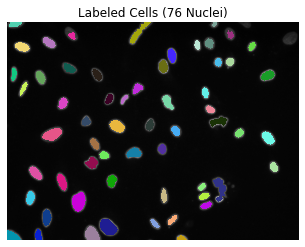

In [62]:
from matplotlib.colors import ListedColormap

rand_cmap = ListedColormap(np.random.rand(256, 3))

labels_for_display=np.where(labels > 0, labels, np.nan)
plt.imshow(im_gray, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('Labeled Cells ({} Nuclei)'.format(nlabels))
plt.show()